In [18]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt  
  
# 加载数据  
final_data_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\final_data.csv'  # 请根据实际情况替换路径  
df_reloaded = pd.read_csv(final_data_path)  
  
# 首先，将数据集划分为训练集和临时集（包含验证集和测试集），比例大致为7:3  
train_df_temp, temp_df = train_test_split(  
    df_reloaded,   
    test_size=0.3,  # 30%的数据作为临时集（之后将再划分为验证集和测试集）  
    stratify=df_reloaded['Patient Sex'],   
    random_state=42  
)  
  
# 然后，将临时集划分为验证集和测试集，比例大致为1.5:1.5（即1:1）  
validation_df, test_df = train_test_split(  
    temp_df,  
    test_size=0.5,  # 将临时集等分为验证集和测试集  
    stratify=temp_df['Patient Sex'],   
    random_state=42  
)  
  
# 为了确保比例正确，可以调整上面的test_size参数，但上面的代码应该已经很接近7:1.5:1.5的比例了  
  
  # 保存三个集合到文件  
train_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\train.csv'  
validation_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\validation.csv'  
test_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\test.csv'  
  
train_df_temp.to_csv(train_path, index=False)  
validation_df.to_csv(validation_path, index=False)  
test_df.to_csv(test_path, index=False)  
  
print("Train, validation, and test sets saved to:", train_path, validation_path, "and", test_path)  
  
# 检查三个集合中的性别比例和年龄统计信息  
train_gender_ratio = train_df_temp['Patient Sex'].value_counts(normalize=True) * 100  
validation_gender_ratio = validation_df['Patient Sex'].value_counts(normalize=True) * 100  
test_gender_ratio = test_df['Patient Sex'].value_counts(normalize=True) * 100  
  
train_age_stats = train_df_temp['Patient Age'].describe()  
validation_age_stats = validation_df['Patient Age'].describe()  
test_age_stats = test_df['Patient Age'].describe()  
  
# 打印结果以进行验证  
print("Training set gender ratio:\n", train_gender_ratio)  
print("\nValidation set gender ratio:\n", validation_gender_ratio)  
print("\nTest set gender ratio:\n", test_gender_ratio)  
print("\nTraining set age statistics:\n", train_age_stats)  
print("\nValidation set age statistics:\n", validation_age_stats)  
print("\nTest set age statistics:\n", test_age_stats)

Train, validation, and test sets saved to: C:\Users\HP\Desktop\指南者\项目\眼病预测\train.csv C:\Users\HP\Desktop\指南者\项目\眼病预测\validation.csv and C:\Users\HP\Desktop\指南者\项目\眼病预测\test.csv
Training set gender ratio:
 Female    54.827089
Male      45.172911
Name: Patient Sex, dtype: float64

Validation set gender ratio:
 Female    54.697987
Male      45.302013
Name: Patient Sex, dtype: float64

Test set gender ratio:
 Female    55.033557
Male      44.966443
Name: Patient Sex, dtype: float64

Training set age statistics:
 count    1388.000000
mean       59.477666
std        14.549627
min         1.000000
25%        54.000000
50%        60.500000
75%        69.000000
max        91.000000
Name: Patient Age, dtype: float64

Validation set age statistics:
 count    298.000000
mean      60.610738
std       13.127046
min        1.000000
25%       54.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: Patient Age, dtype: float64

Test set age statistics:
 count    298.000000
mean      

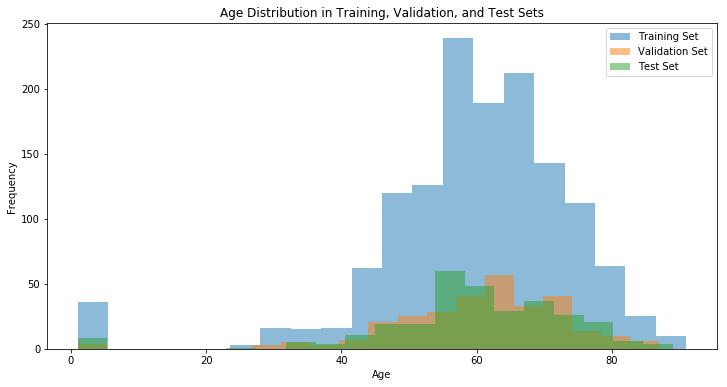

In [19]:
# （可选）绘制三个集合的年龄分布直方图  
plt.figure(figsize=(12, 6))  
plt.hist(train_df_temp['Patient Age'], bins=20, alpha=0.5, label='Training Set')  
plt.hist(validation_df['Patient Age'], bins=20, alpha=0.5, label='Validation Set')  
plt.hist(test_df['Patient Age'], bins=20, alpha=0.5, label='Test Set')  
plt.title('Age Distribution in Training, Validation, and Test Sets')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.legend()  
plt.show()  

In [20]:
import pandas as pd  
  
# 读取CSV文件  
file_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\train.csv'  # 替换为你的CSV文件路径  
df = pd.read_csv(file_path)  
  
# 如果labels列的值是列表的字符串表示（例如："['C']"），则需要先将它们转换为单个标签字符串  
# 假设labels列的值是类似"['C']"这样的格式，我们需要去掉方括号和引号  
import ast  
  
def clean_label(label):  
    # 使用ast.literal_eval将字符串表示的列表转换回列表  
    label_list = ast.literal_eval(label)  
    # 假设列表只有一个元素，我们取第一个元素作为标签  
    return label_list[0] if label_list else None  
  
# 应用clean_label函数到labels列  
df['labels'] = df['labels'].apply(clean_label)  
  
# 现在统计labels列中各个值的出现次数  
label_counts = df['labels'].value_counts()  
  
# 打印结果  
print(label_counts)

C    365
D    351
N    345
M    327
Name: labels, dtype: int64


In [21]:
import pandas as pd  
  
# 读取CSV文件  
file_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\test.csv'  # 替换为你的CSV文件路径  
df = pd.read_csv(file_path)  
  
# 如果labels列的值是列表的字符串表示（例如："['C']"），则需要先将它们转换为单个标签字符串  
# 假设labels列的值是类似"['C']"这样的格式，我们需要去掉方括号和引号  
import ast  
  
def clean_label(label):  
    # 使用ast.literal_eval将字符串表示的列表转换回列表  
    label_list = ast.literal_eval(label)  
    # 假设列表只有一个元素，我们取第一个元素作为标签  
    return label_list[0] if label_list else None  
  
# 应用clean_label函数到labels列  
df['labels'] = df['labels'].apply(clean_label)  
  
# 现在统计labels列中各个值的出现次数  
label_counts = df['labels'].value_counts()  
  
# 打印结果  
print(label_counts)

C    83
N    76
D    74
M    65
Name: labels, dtype: int64


In [22]:
import pandas as pd  
  
# 读取CSV文件  
file_path = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\validation.csv'  # 替换为你的CSV文件路径  
df = pd.read_csv(file_path)  
  
# 如果labels列的值是列表的字符串表示（例如："['C']"），则需要先将它们转换为单个标签字符串  
# 假设labels列的值是类似"['C']"这样的格式，我们需要去掉方括号和引号  
import ast  
  
def clean_label(label):  
    # 使用ast.literal_eval将字符串表示的列表转换回列表  
    label_list = ast.literal_eval(label)  
    # 假设列表只有一个元素，我们取第一个元素作为标签  
    return label_list[0] if label_list else None  
  
# 应用clean_label函数到labels列  
df['labels'] = df['labels'].apply(clean_label)  
  
# 现在统计labels列中各个值的出现次数  
label_counts = df['labels'].value_counts()  
  
# 打印结果  
print(label_counts)

C    92
N    79
D    75
M    52
Name: labels, dtype: int64


In [23]:
import os  
import shutil  
  
# 假设原始图像文件夹路径  
source_folder = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\chosen_images'  
  
# 新的训练集、测试集和验证集图像文件夹路径  
train_images_folder = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\train_images'  
test_images_folder = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\test_images'  
validation_images_folder = r'C:\Users\HP\Desktop\指南者\项目\眼病预测\validation_images'  
  
# 创建新的文件夹（如果它们不存在）  
os.makedirs(train_images_folder, exist_ok=True)  
os.makedirs(test_images_folder, exist_ok=True)  
os.makedirs(validation_images_folder, exist_ok=True)  
  
# 假设 train_df_temp, test_df, validation_df 是已经加载的 DataFrame，且包含列 'filename'  
# 其中 'filename' 列包含没有扩展名的整数文件名  
train_filenames_int = train_df_temp['filename'].tolist()  
test_filenames_int = test_df['filename'].tolist()  
validation_filenames_int = validation_df['filename'].tolist()  
  
# 将整数文件名转换为字符串并添加 .jpg 扩展名  
train_filenames_str = [str(filename) + '.jpg' for filename in train_filenames_int]  
test_filenames_str = [str(filename) + '.jpg' for filename in test_filenames_int]  
validation_filenames_str = [str(filename) + '.jpg' for filename in validation_filenames_int]  
  
# 复制训练集图像到新的训练集文件夹  
for filename in train_filenames_str:  
    source_path = os.path.join(source_folder, filename)  
    destination_path = os.path.join(train_images_folder, filename)  
    shutil.copy(source_path, destination_path)  
  
# 复制测试集图像到新的测试集文件夹  
for filename in test_filenames_str:  
    source_path = os.path.join(source_folder, filename)  
    destination_path = os.path.join(test_images_folder, filename)  
    shutil.copy(source_path, destination_path)  
  
# 复制验证集图像到新的验证集文件夹  
for filename in validation_filenames_str:  
    source_path = os.path.join(source_folder, filename)  
    destination_path = os.path.join(validation_images_folder, filename)  
    shutil.copy(source_path, destination_path)  
  
print("Images have been copied to the respective train, test, and validation folders.")

Images have been copied to the respective train, test, and validation folders.


In [25]:
import numpy as np
import os
from pathlib import Path
from PIL import Image

# 函数用于归一化图片
def normalize_image(image_path, output_folder):
    # 读取图片并转换为浮点数
    image_array = np.array(Image.open(image_path), dtype=np.float32)
    
    # 计算均值和标准差
    mean = image_array.mean()
    std_dev = image_array.std()

    # 归一化处理
    normalized_image_array = (image_array - mean) / std_dev

    # 确保输出目录存在
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # 保存归一化后的图像为.npy文件
    np.save(output_path / (Path(image_path).stem + '.npy'), normalized_image_array)

# 归一化指定文件夹中的所有图片
def normalize_folder(folder_path, output_folder):
    # 获取所有JPEG图片的文件路径
    image_paths = list(Path(folder_path).glob('*.jpg'))
    for image_path in image_paths:
        normalize_image(image_path, output_folder)

# 调用函数归一化train_images和test_images文件夹中的图片
normalize_folder(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\train_images', r'C:\Users\HP\Desktop\指南者\项目\眼病预测\normalized_train_images')
normalize_folder(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\test_images', r'C:\Users\HP\Desktop\指南者\项目\眼病预测\normalized_test_images')
normalize_folder(r'C:\Users\HP\Desktop\指南者\项目\眼病预测\validation_images', r'C:\Users\HP\Desktop\指南者\项目\眼病预测\normalized_validation_images')